# Homework

In [58]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal


df = pd.read_csv('temperature.csv')

df['datetime'] = pd.to_datetime(df['datetime'])

### 1. Write a function that efficiently converts every column to a different temperature scale

In [59]:
#this feels like the most useless function I could have possibly written and doing it not in a function would have made more 
#sense. 

def celsius(dataframe):
    dataframe.iloc[:,1:] = dataframe.iloc[:,1:].applymap(lambda x: x-273.15)
    return dataframe
celsius(df)



,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
1,2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2,2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
3,2012-10-01 15:00:00,11.476998,8.941866,16.310618,8.639833,18.712844,18.393355,20.242177,23.481487,12.083952,...,12.606824,15.176940,12.697790,14.081672,34.241513,31.131841,37.261538,31.25,31.25,30.35
4,2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,...,12.700440,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,8.850000,NaN,7.670000,20.400000,19.000000,16.390000,21.560000,12.570000,...,17.090000,NaN,1.980000,14.930000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,9.740000,NaN,8.500000,22.530000,19.590000,17.460000,22.440000,13.300000,...,16.090000,NaN,0.980000,12.870000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,10.240000,NaN,9.600000,22.810000,19.430000,18.190000,23.100000,13.290000,...,13.630000,NaN,0.330000,10.790000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,9.870000,NaN,9.810000,22.500000,19.460000,19.000000,24.000000,12.990000,...,11.420000,NaN,-0.670000,9.020000,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [33]:
#totally doesn't work. Only gets me Jerusalem. 
#for k in range (len(df.columns)):
 #   column = df.columns[k]
 #   x = df['datetime']
 #   knowns = df.loc[~df[column].isnull(), ['datetime', column]]
 #   xp = knowns['datetime']
 #   fp = np.array(knowns[column])
#test = pd.DataFrame.append({'datetime':x, column: np.interp(x, xp, fp)})
#test.head()


In [60]:
df.isnull().sum()


datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [61]:
#I tried so hard to get this like my first one where I could simply call the function instead of add it in an "apply" but I ran
#out of time trying to force it to my will. I'm going to have to do it in this cheating way. But again, my function in #1 feels 
#odd and a bit like I'm cheating. I know there has to be a better way to loop through the columns but I just couldn't get there. 


def interpolate_this(df):
   return df.interpolate(method ='linear', limit_direction ='forward',limit=2)
new_df = df.iloc[: , 1:].apply(interpolate_this,axis=0)

new_df.isnull().sum()


Vancouver            791
Portland               1
San Francisco        791
Seattle                1
Los Angeles            1
San Diego              1
Las Vegas              1
Phoenix                1
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 1
Houston                1
Kansas City            1
Minneapolis            7
Saint Louis            1
Chicago                1
Nashville              1
Indianapolis           1
Atlanta                1
Detroit                1
Jacksonville           1
Charlotte              1
Miami                792
Pittsburgh             1
Toronto                1
Philadelphia           1
New York             791
Montreal               1
Boston                 1
Beersheba            794
Tel Aviv District    791
Eilat                790
Haifa                794
Nahariyya            791
Jerusalem            791
dtype: int64

### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [63]:
#Bin reminder 
#bins = [0,9,14,19,24,29,34,39, 150]
#label = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']
#purchase_data[''] = pd.cut(purchase_data["Age"], bins, labels = label)
#age_demo_group = purchase_data.groupby('')
#kount = age_demo_group['SN'].nunique()
#percent = kount / purchase_data['SN'].nunique() * 100.0
#age_df = pd.DataFrame(
#    {' Total Count': kount,
#    'Percentage of Players': percent})

df.describe()

#Las Vegas and San Diego look like they might fit the bill so checking them out... 
#Like everything else I've done in this homework this doesn't feel like the best way to go about it. Ideally I'd like to check 
#every city against each other and group by a specific date range and get the mean and have those means compare against each other 
#and having python return the most extreme example... but what I seem to be capable of doing is putting things in bins and grouping
#them like this after already doing a visual check on the data. 

#This round of homework I'd really like to see the 'right' answers for. 


df['month'] = df['datetime'].dt.month
#print(df['month'])
bin = [1,3,6,9,12]
#print(bin)
season = ['Winter', 'ignoreme', 'Summer', 'dont care']
df['season'] = pd.cut(df['month'], bin, labels = season)
#print(df['season'])
group = df.groupby('season')
mean = {'Las Vegas': group['Las Vegas'].mean(), 'San Diego': group['San Diego'].mean()}


mean_df = pd.DataFrame(mean)
mean_df

#vegas is colder in winter than san diego. The summer is hotter than san diego. 

,Las Vegas,San Diego
season,,
Winter,13.244675,14.224702
ignoreme,24.046965,17.401596
Summer,29.936515,21.852449
dont care,12.705432,15.572986


### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

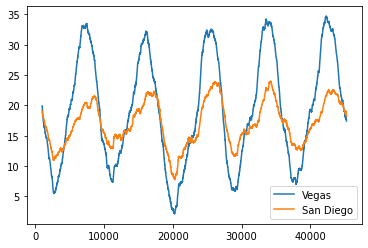

In [49]:
fig, ax = plt.subplots()
ax.plot(df['Las Vegas'].rolling(1000).mean(), label='Vegas')
ax.plot(df['San Diego'].rolling(1000).mean(), label='San Diego')
plt.legend()
plt.show()